In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
life_expectancy_data<-read_csv("LifeExpectancyData (1).csv")#reading in the raw dataset

life_expectancy_data<-life_expectancy_data |>#changes the status variable to a factor datatype
mutate(Status=as_factor(Status))

intial_nrows<-nrow(life_expectancy_data)#count the number of rows initially in the dataset

life_expectancy_data<-na.omit(life_expectancy_data)#removes all observation that have missing values in any of its cell

final_nrows<-nrow(life_expectancy_data)#count the number of rows after the removing observations with missing values 

colnames(life_expectancy_data) <- make.names(colnames(life_expectancy_data))#removes the spaces from the varibale names

life_expectancy_data<-rename(life_expectancy_data,thinness.10.to.19.years=thinness..1.19.years
                             ,thinness.5.to.9.years=thinness.5.9.years)#renaming variables that were labelled incorrectly
head(life_expectancy_data,6)#output the first 6 observations in the dataset

Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness.10.to.19.years,thinness.5.to.9.years,Income.composition.of.resources,Schooling
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [3]:
life_expectancy_data<-mutate(life_expectancy_data,thinness.5.to.19.years=thinness.10.to.19.years+thinness.5.to.9.years)#calculate the prevelance of thinness between the ages of 5 and 19

life_expectancy_data<-select(life_expectancy_data,GDP,Country, Status, Life.expectancy, Schooling, percentage.expenditure,Adult.Mortality,Income.composition.of.resources,thinness.5.to.19.years)#selection of useful variables

life_expectancy_split <- initial_split(life_expectancy_data,prop=0.80,strata=Status)#splitting the dataset into 80% training and 20% test set
    life_expectancy_train<-training(life_expectancy_split)
    life_expectancy_test<-testing(life_expectancy_split)

num_rows_deleted<-intial_nrows-final_nrows#calulate the number of rows removed
print("Number Of Rows Deleted")
num_rows_deleted

status_count_train<-life_expectancy_train|>#outputs the count of the number of instances for developed and developing countries
    group_by(Status)|>
    summarize(count=n())
status_count_train

mean_variables_train<-life_expectancy_train|>#finding the average of some of the relevent predictors
    group_by(Country)|>
    summarize(avg_life_exp=mean(Life.expectancy),avg_GDP=mean(GDP),avg_percent_exp=mean(percentage.expenditure),avg_schooling_years=mean(Schooling),avg_income_comp=mean(Income.composition.of.resources),avg_adult_mort=mean(Adult.Mortality),avg_thinness=mean(thinness.5.to.19.years))|>
    head(6)
mean_variables_train


[1] "Number Of Rows Deleted"


[1] 1289

Status,count
<fct>,<int>
Developing,1125
Developed,193


Country,avg_life_exp,avg_GDP,avg_percent_exp,avg_schooling_years,avg_income_comp,avg_adult_mort,avg_thinness
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,58.17500,335.8155,32.45617,8.125000,0.4120833,264.25000,30.400000
Albania,75.39286,2406.4869,219.58029,12.292857,0.7134286,43.14286,3.264286
Algeria,74.08889,2937.8362,266.11129,13.033333,0.7046667,99.44444,11.911111
Angola,50.95714,2802.5035,163.61945,9.671429,0.4964286,361.57143,17.828571
Argentina,75.00000,5193.1445,791.38595,16.440000,0.7875000,105.60000,2.020000
Armenia,73.36667,2229.5262,168.66556,11.875000,0.6991667,113.08333,4.150000


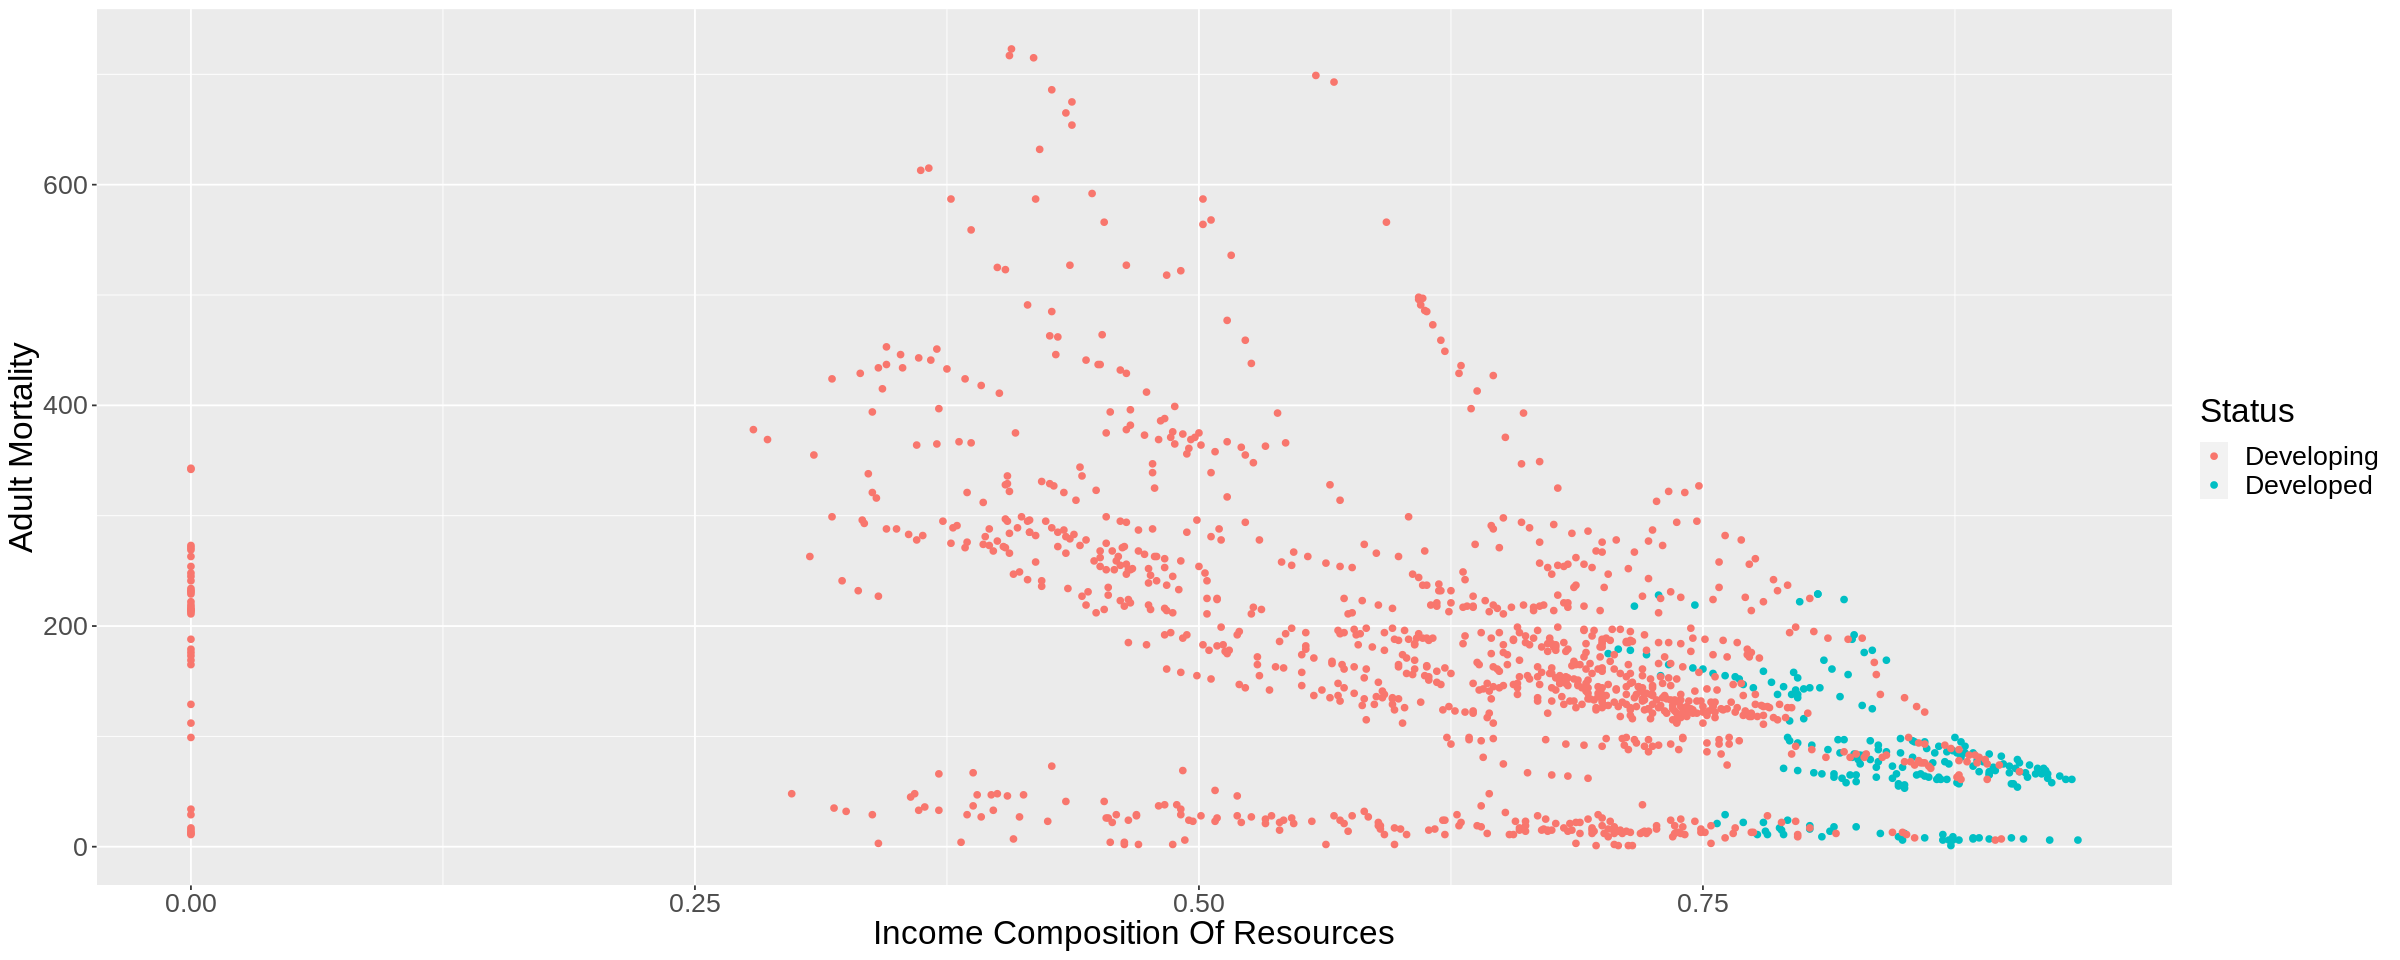

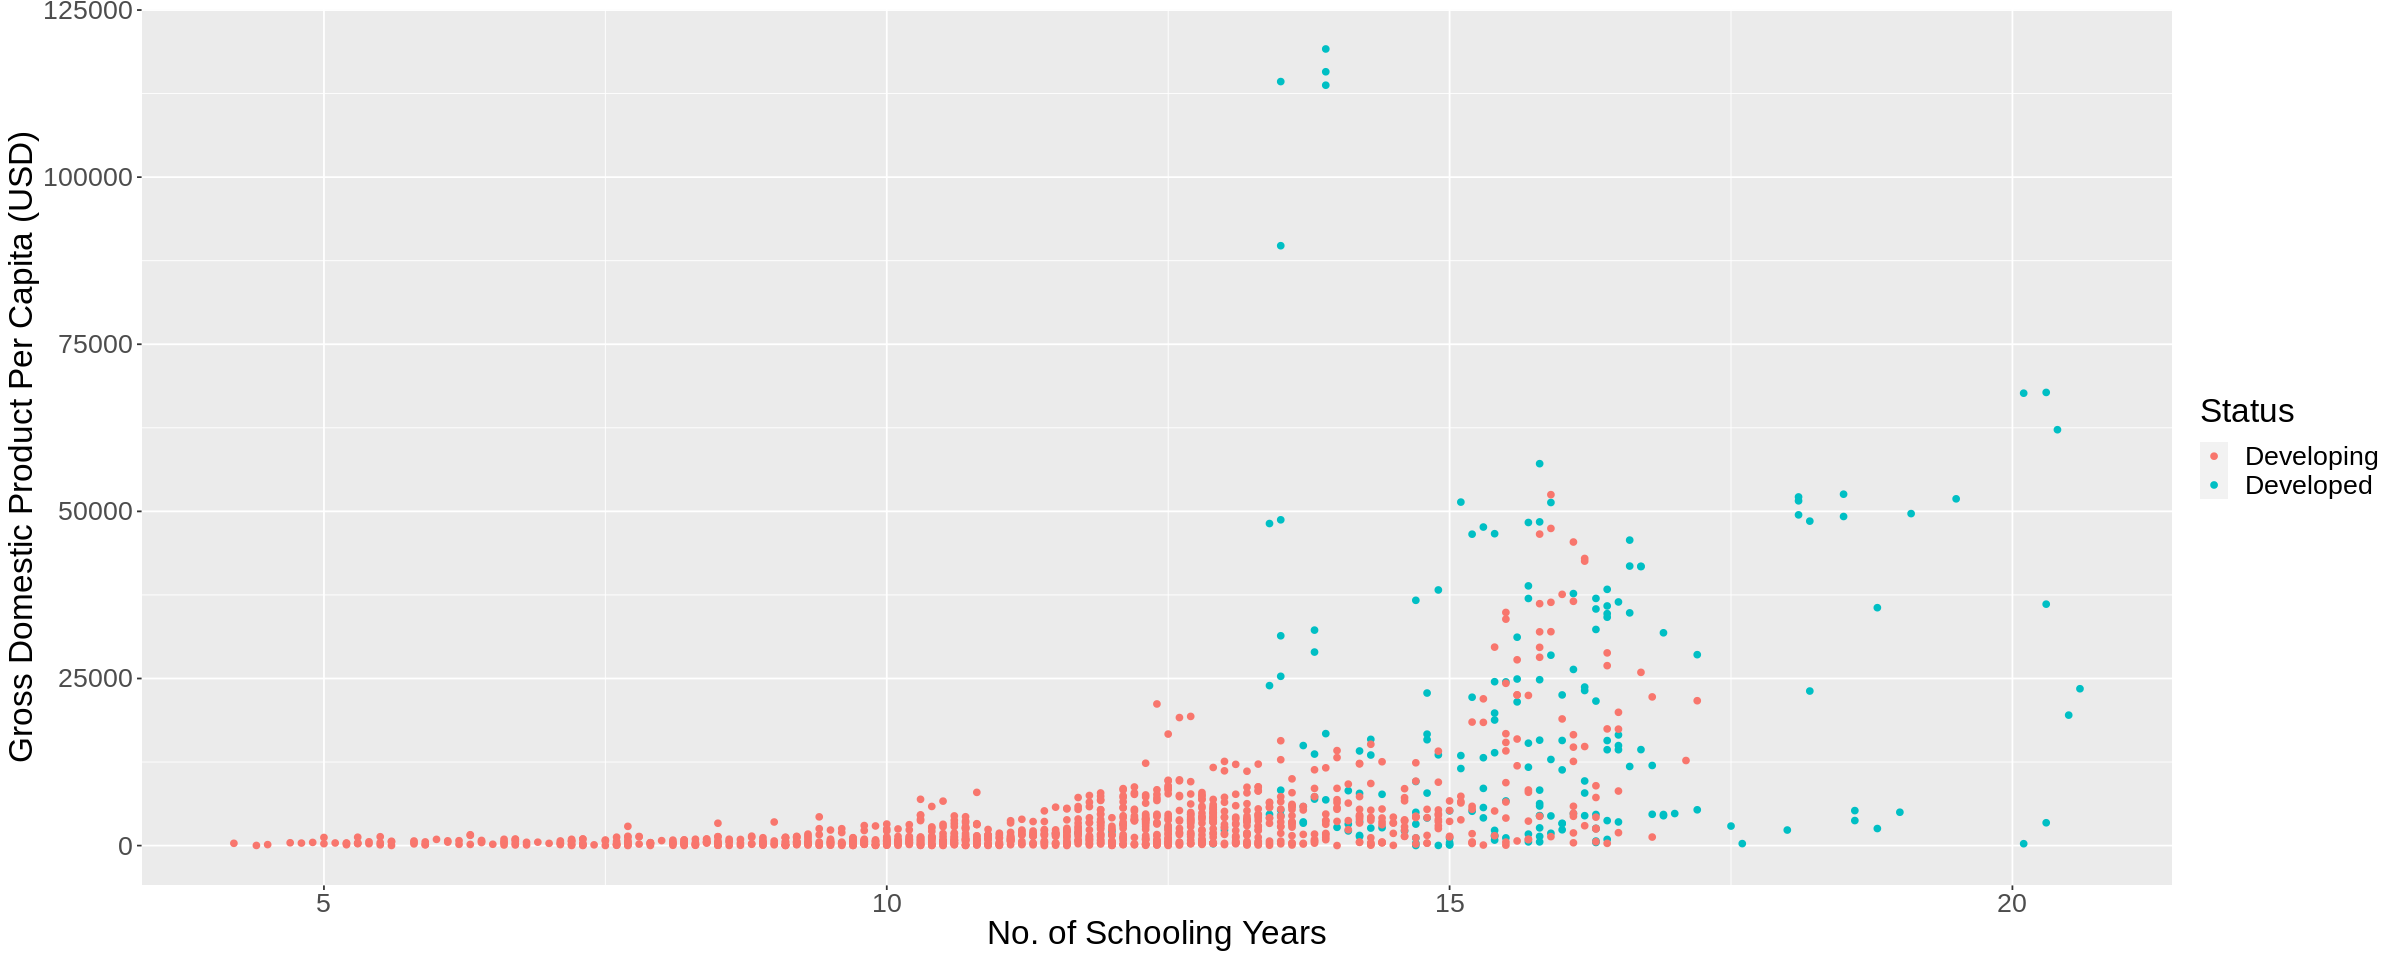

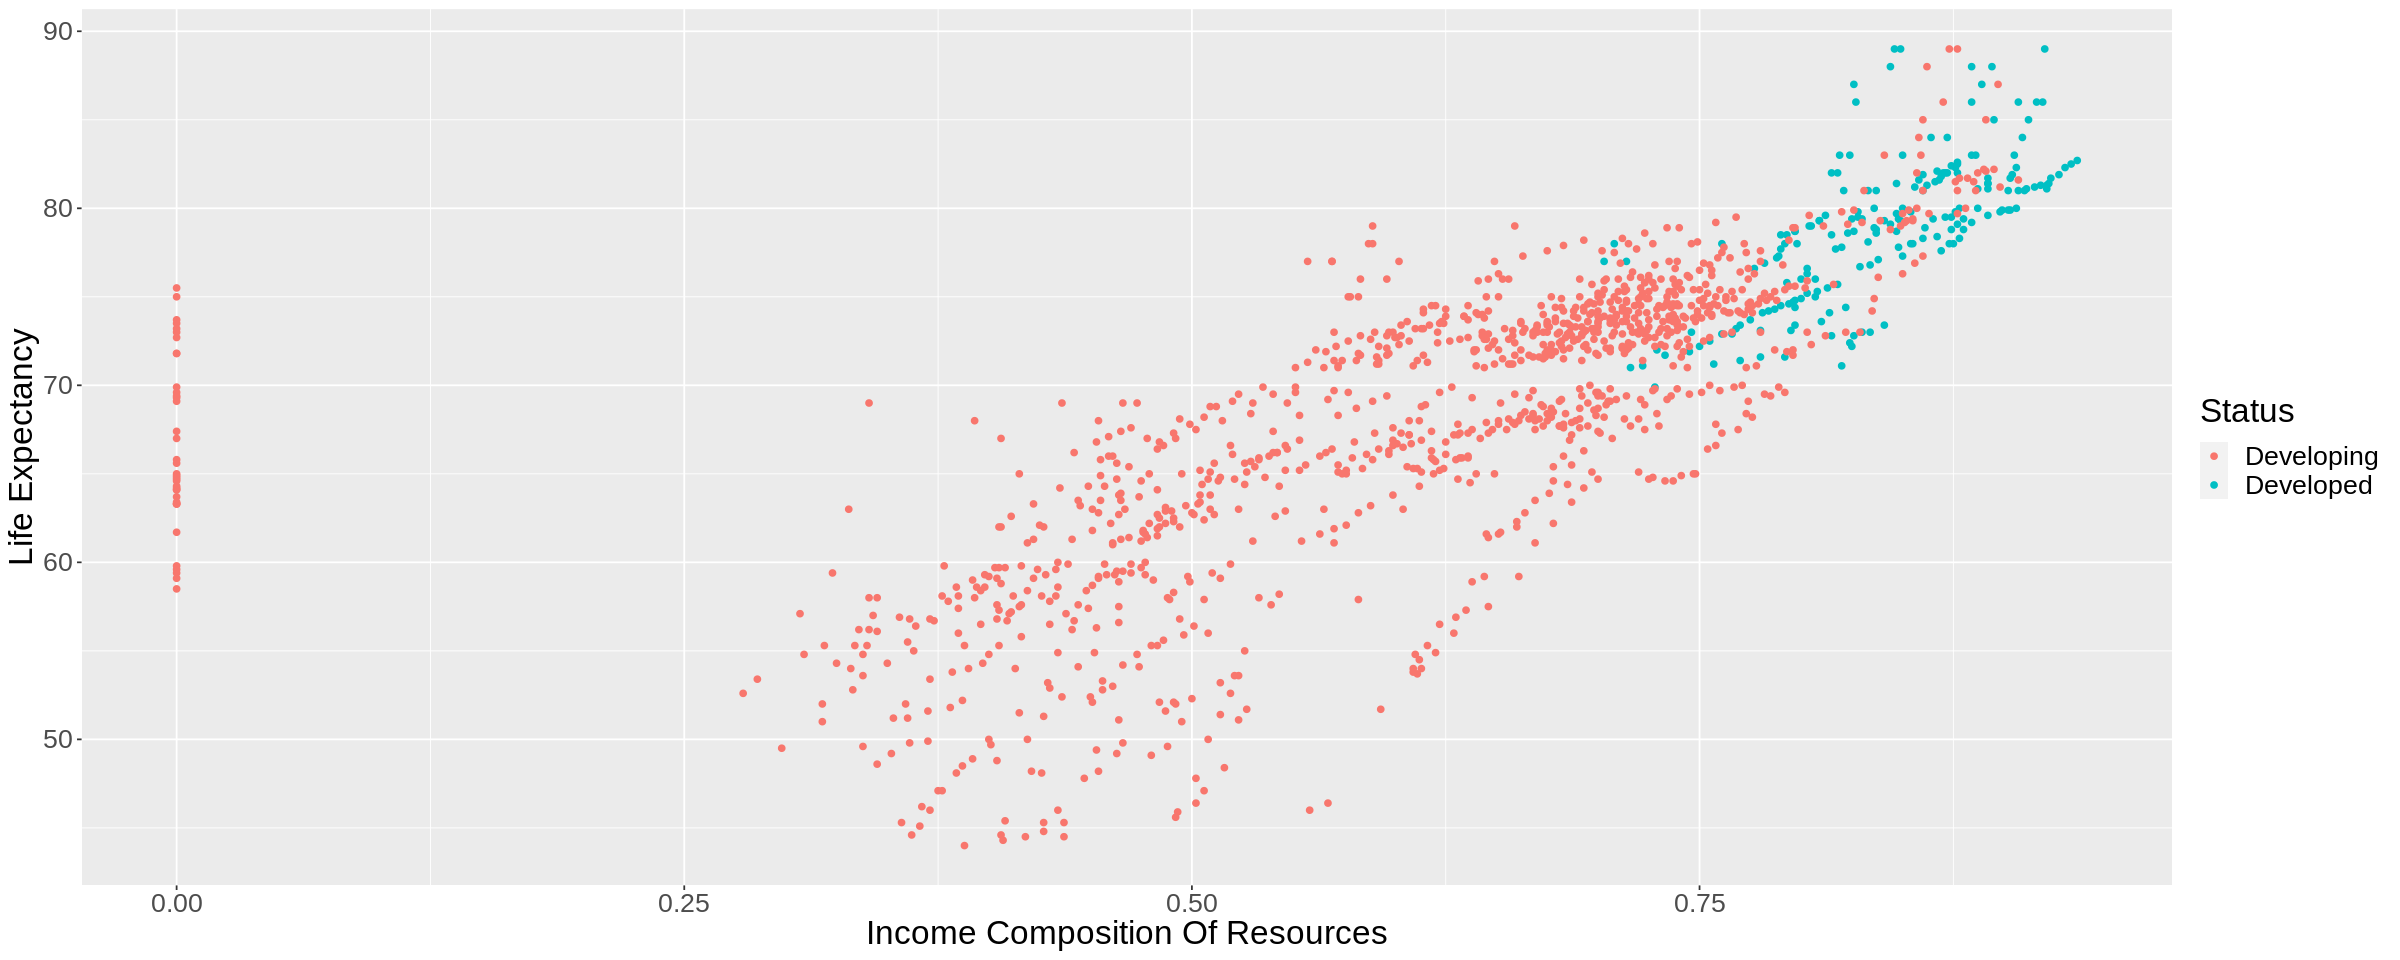

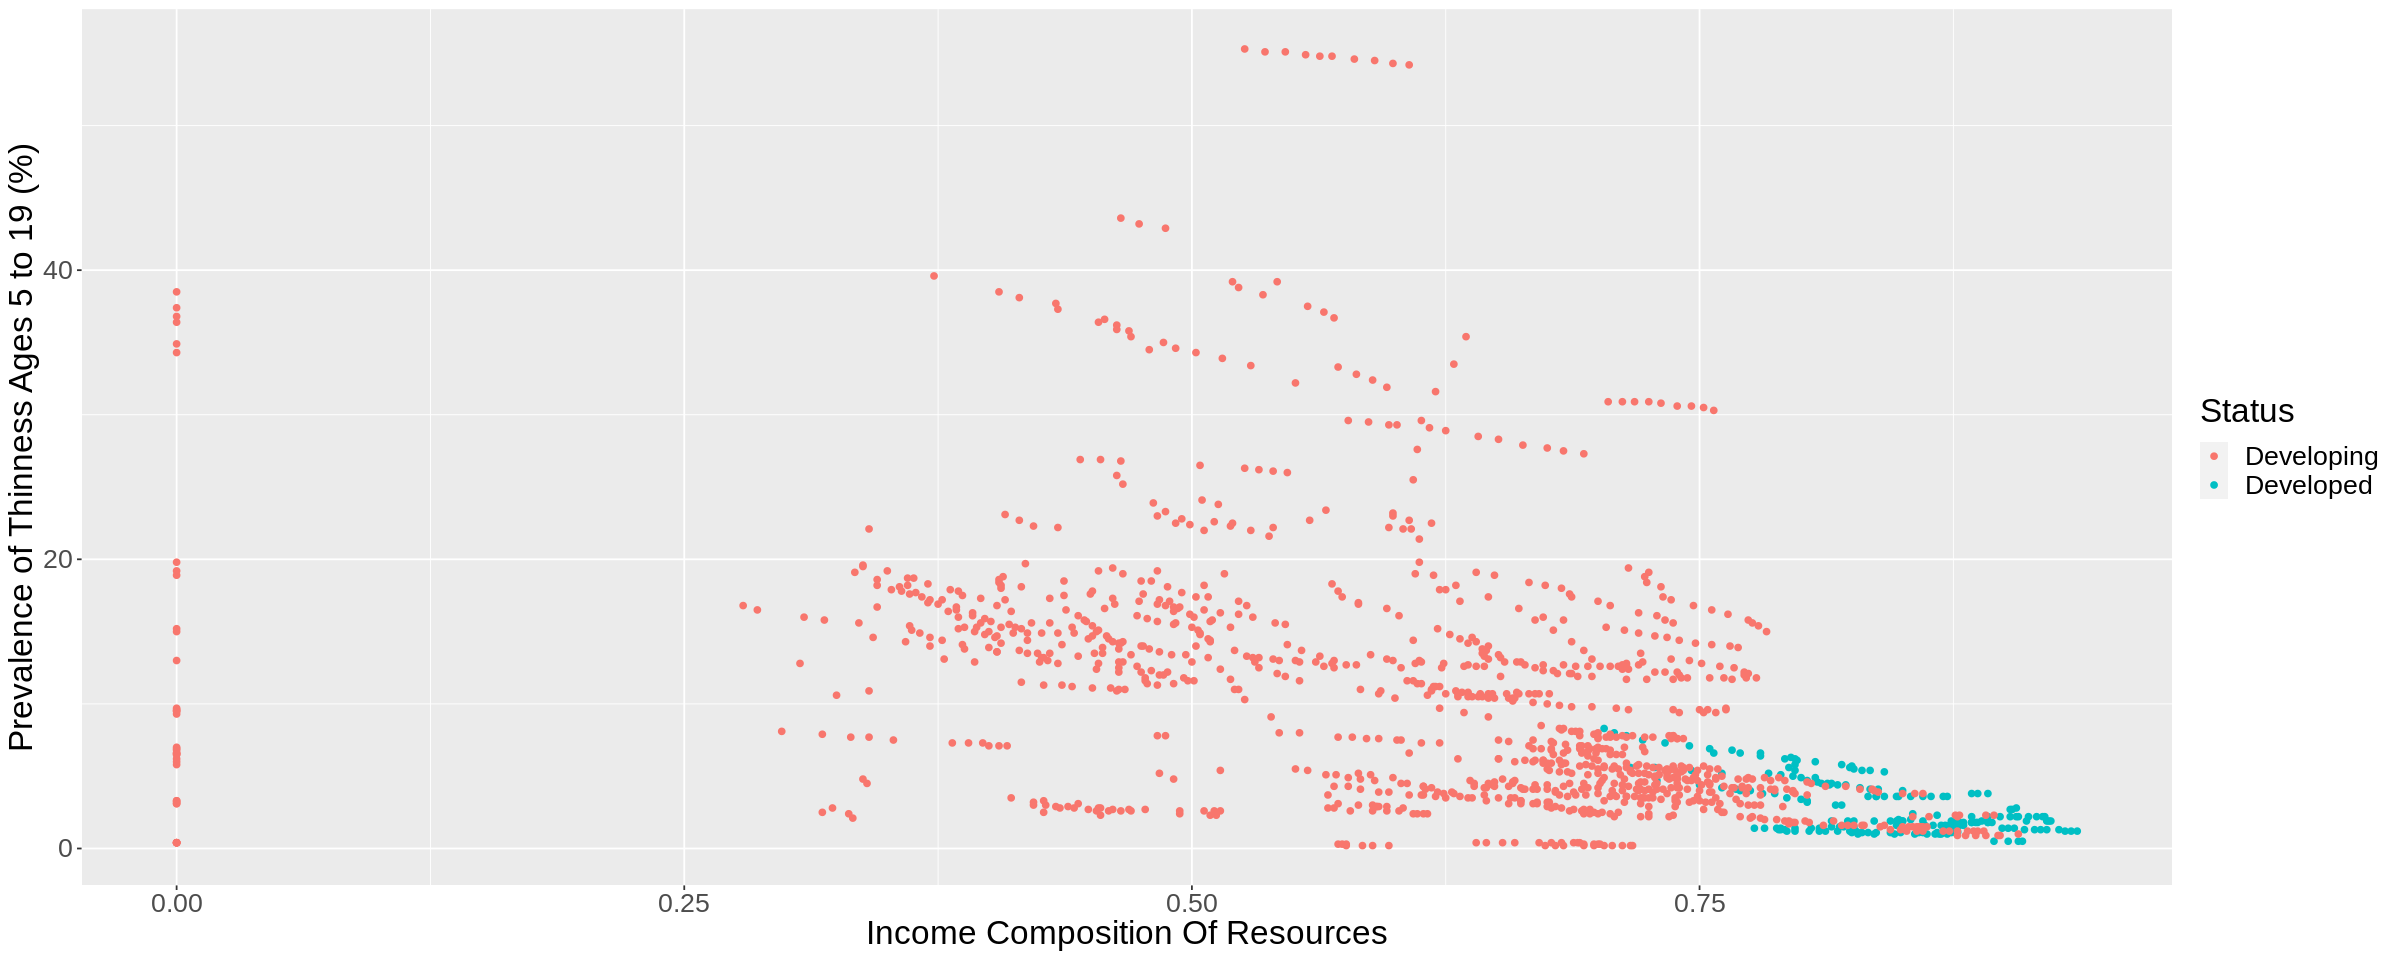

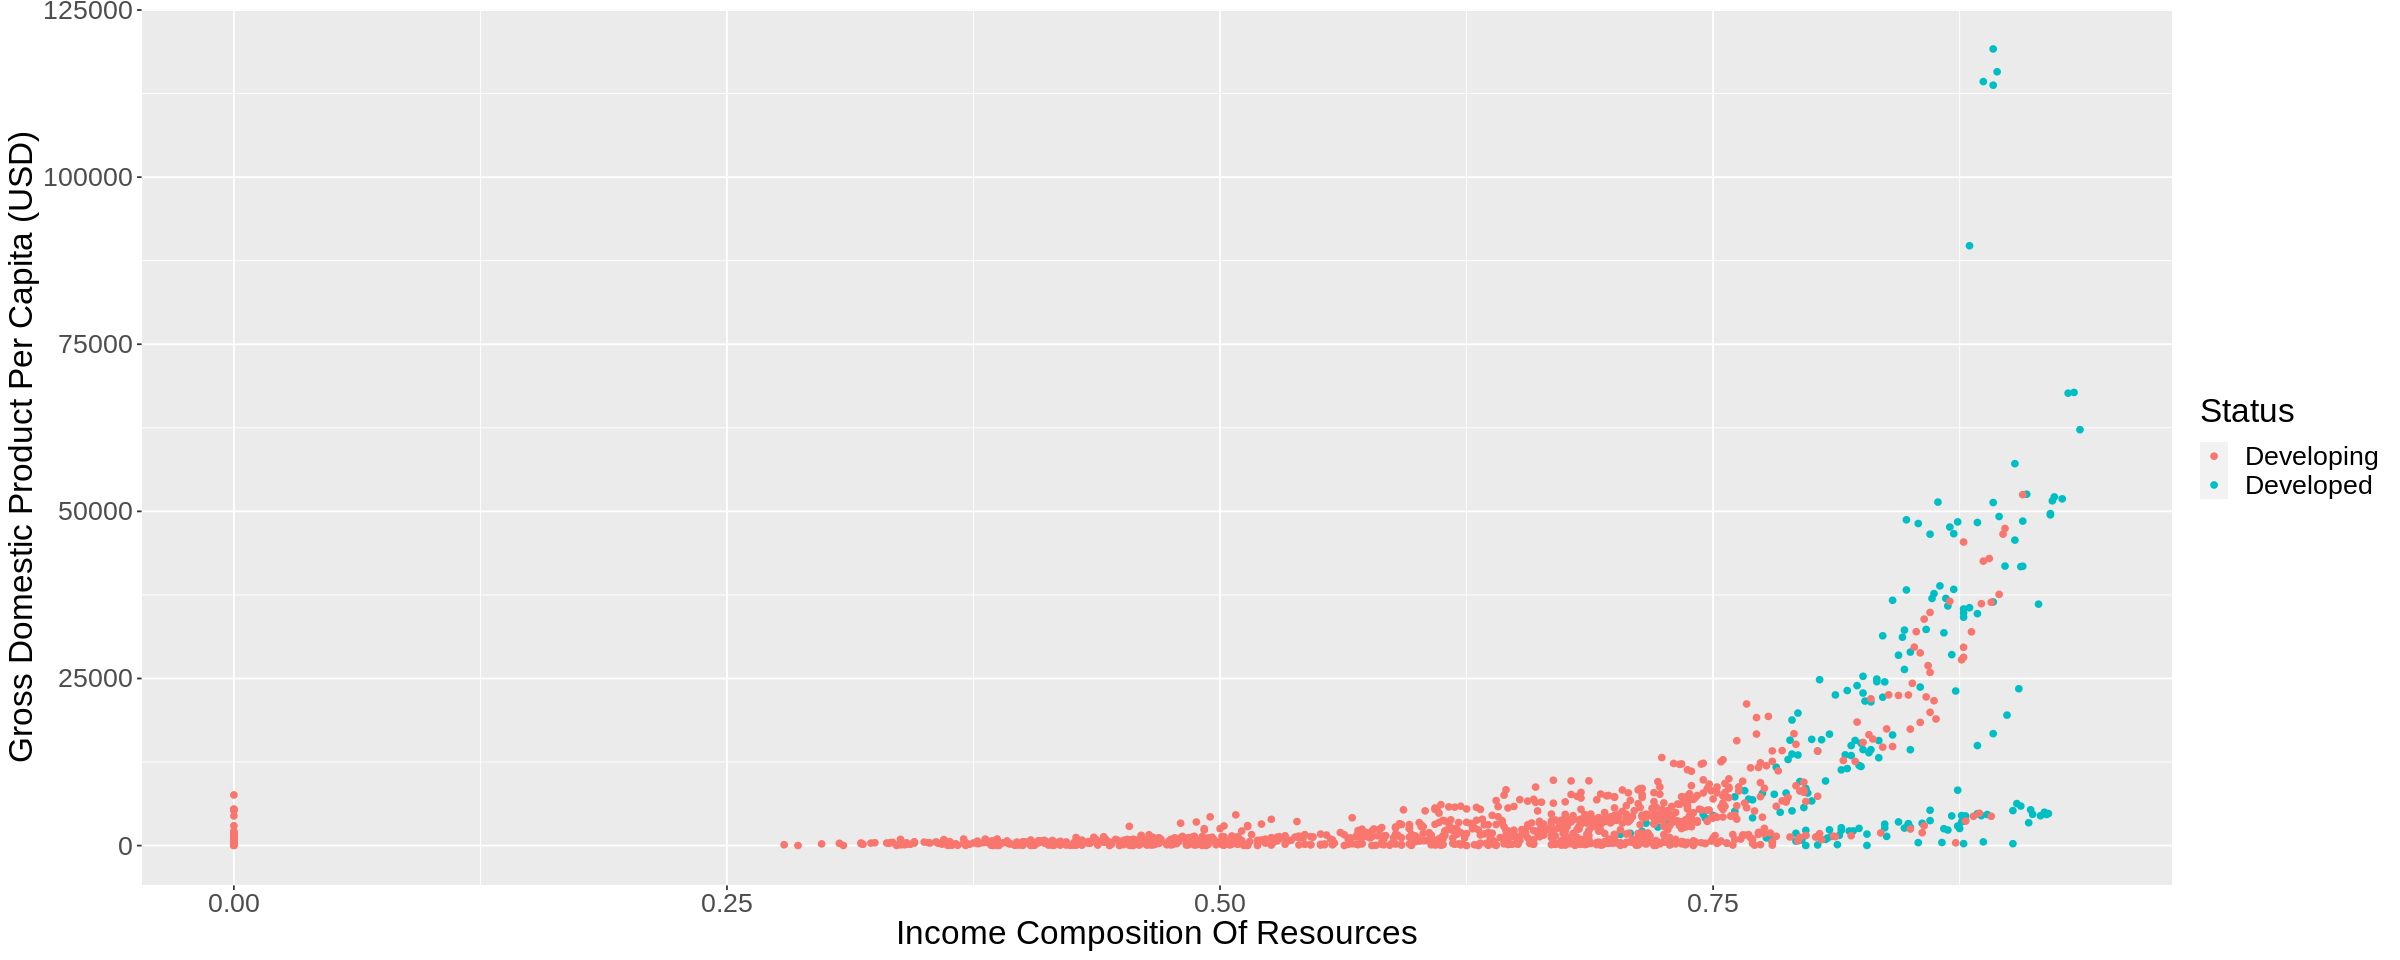

In [4]:
options(repr.plot.width = 20, repr.plot.height = 8)

Adult_mort_vs_income_comp<-life_expectancy_train|>#relationship between Adult Mortalitiy and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=Adult.Mortality,colour=Status))+
    geom_point()+
    ylab("Adult Mortality")+
    xlab("Income Composition Of Resources")+
    theme(text = element_text(size = 20))
Adult_mort_vs_income_comp

Schooling_vs_GDP<-life_expectancy_train|>#relationship between schooling years and GDP
    ggplot(aes(x=Schooling,y=GDP,colour=Status))+
    geom_point()+
    xlab("No. of Schooling Years")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    theme(text = element_text(size = 20))  
Schooling_vs_GDP

Life_exp_vs_income_comp<-life_expectancy_train|>#relationship between Life Expectancy and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=Life.expectancy,colour=Status))+
    geom_point()+
    xlab("Income Composition Of Resources")+
    ylab("Life Expectancy")+
    theme(text = element_text(size = 20))  
Life_exp_vs_income_comp

thinness_vs_income_comp<-life_expectancy_train|>#relationship between Thinness in children ages 5 to 19 and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=thinness.5.to.19.years,colour=Status))+
    geom_point()+
    xlab("Income Composition Of Resources")+
    ylab("Prevalence of Thinness Ages 5 to 19 (%)")+
    theme(text = element_text(size = 20))  
thinness_vs_income_comp

GDP_vs_income_comp<-life_expectancy_train|>#relationship between GDP and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=GDP,colour=Status))+
    geom_point()+
    xlab("Income Composition Of Resources")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    theme(text = element_text(size = 20))  
GDP_vs_income_comp
